# Assignment 2

In [75]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

## Task a)

In [76]:
# Splitting the data into train and test set
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=302)

columns=["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Lat", "Long", "MedHouseVal"]
data = pd.DataFrame(data=np.column_stack((X_train, y_train)), columns=columns)

print("Size of the data:")
print(data.shape)

data.head()


Size of the data:
(15480, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Lat,Long,MedHouseVal
0,3.3409,32.0,3.254902,1.009804,177.0,1.735294,33.90,-118.37,2.563
1,4.0000,35.0,4.938095,0.985714,552.0,2.628571,37.71,-122.12,1.679
2,4.1997,17.0,5.732759,1.060345,2866.0,3.088362,38.66,-121.76,1.334
3,5.6163,27.0,6.515670,1.005698,1140.0,3.247863,33.83,-117.87,2.310
4,1.6559,48.0,5.161663,1.000000,1363.0,3.147806,33.99,-118.31,1.014


In [77]:
print("Structure of the data:")
print(data.describe())

Structure of the data:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  15480.000000  15480.000000  15480.000000  15480.000000  15480.000000   
mean       3.867932     28.634044      5.431607      1.095960   1421.528811   
std        1.899344     12.642321      2.388734      0.427406   1124.197972   
min        0.499900      1.000000      0.846154      0.375000      3.000000   
25%        2.565800     18.000000      4.443769      1.006118    787.000000   
50%        3.528800     29.000000      5.230702      1.048833   1163.000000   
75%        4.744150     37.000000      6.060497      1.099431   1719.250000   
max       15.000100     52.000000    141.909091     25.636364  35682.000000   

           AveOccup           Lat          Long   MedHouseVal  
count  15480.000000  15480.000000  15480.000000  15480.000000  
mean       3.112156     35.634422   -119.569263      2.068206  
std       11.959223      2.138867      2.004747      1.156928  
min      

In [78]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15480 entries, 0 to 15479
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       15480 non-null  float64
 1   HouseAge     15480 non-null  float64
 2   AveRooms     15480 non-null  float64
 3   AveBedrms    15480 non-null  float64
 4   Population   15480 non-null  float64
 5   AveOccup     15480 non-null  float64
 6   Lat          15480 non-null  float64
 7   Long         15480 non-null  float64
 8   MedHouseVal  15480 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB
None


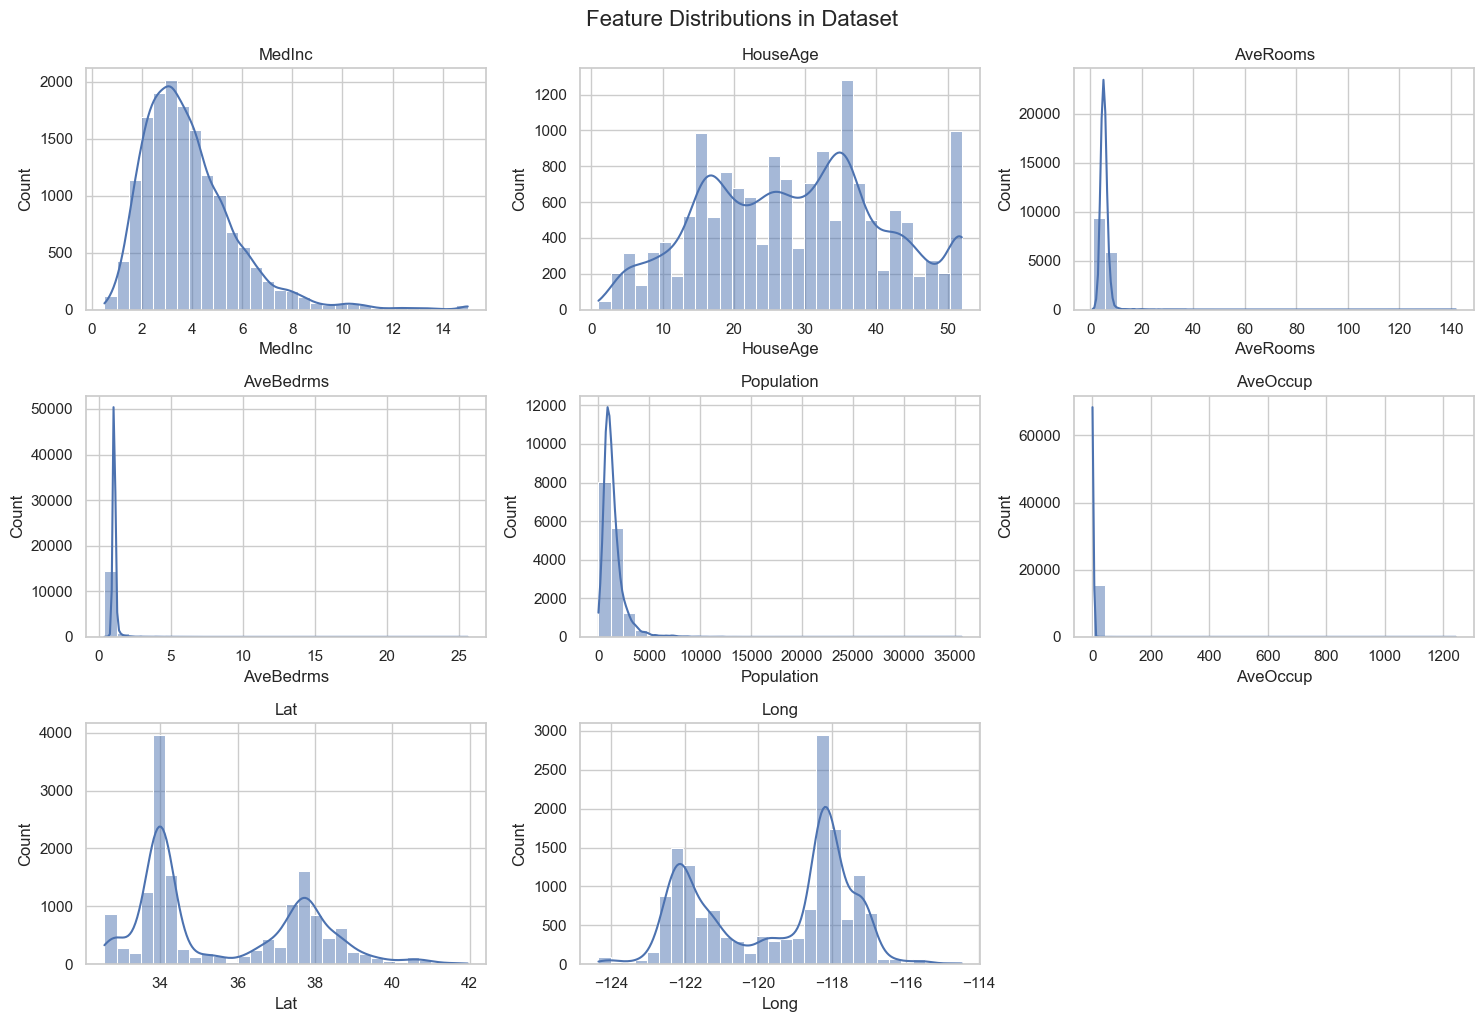

In [79]:
# Plotting feature distributions
def plot_feature_distributions(data, title):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(data.columns, 1):
        plt.subplot(3, 3, i)
        sns.histplot(data[column], kde=True, bins=30)
        plt.title(column)
    plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.show()

plot_feature_distributions(data.iloc[:, :-1], "Feature Distributions in Dataset")

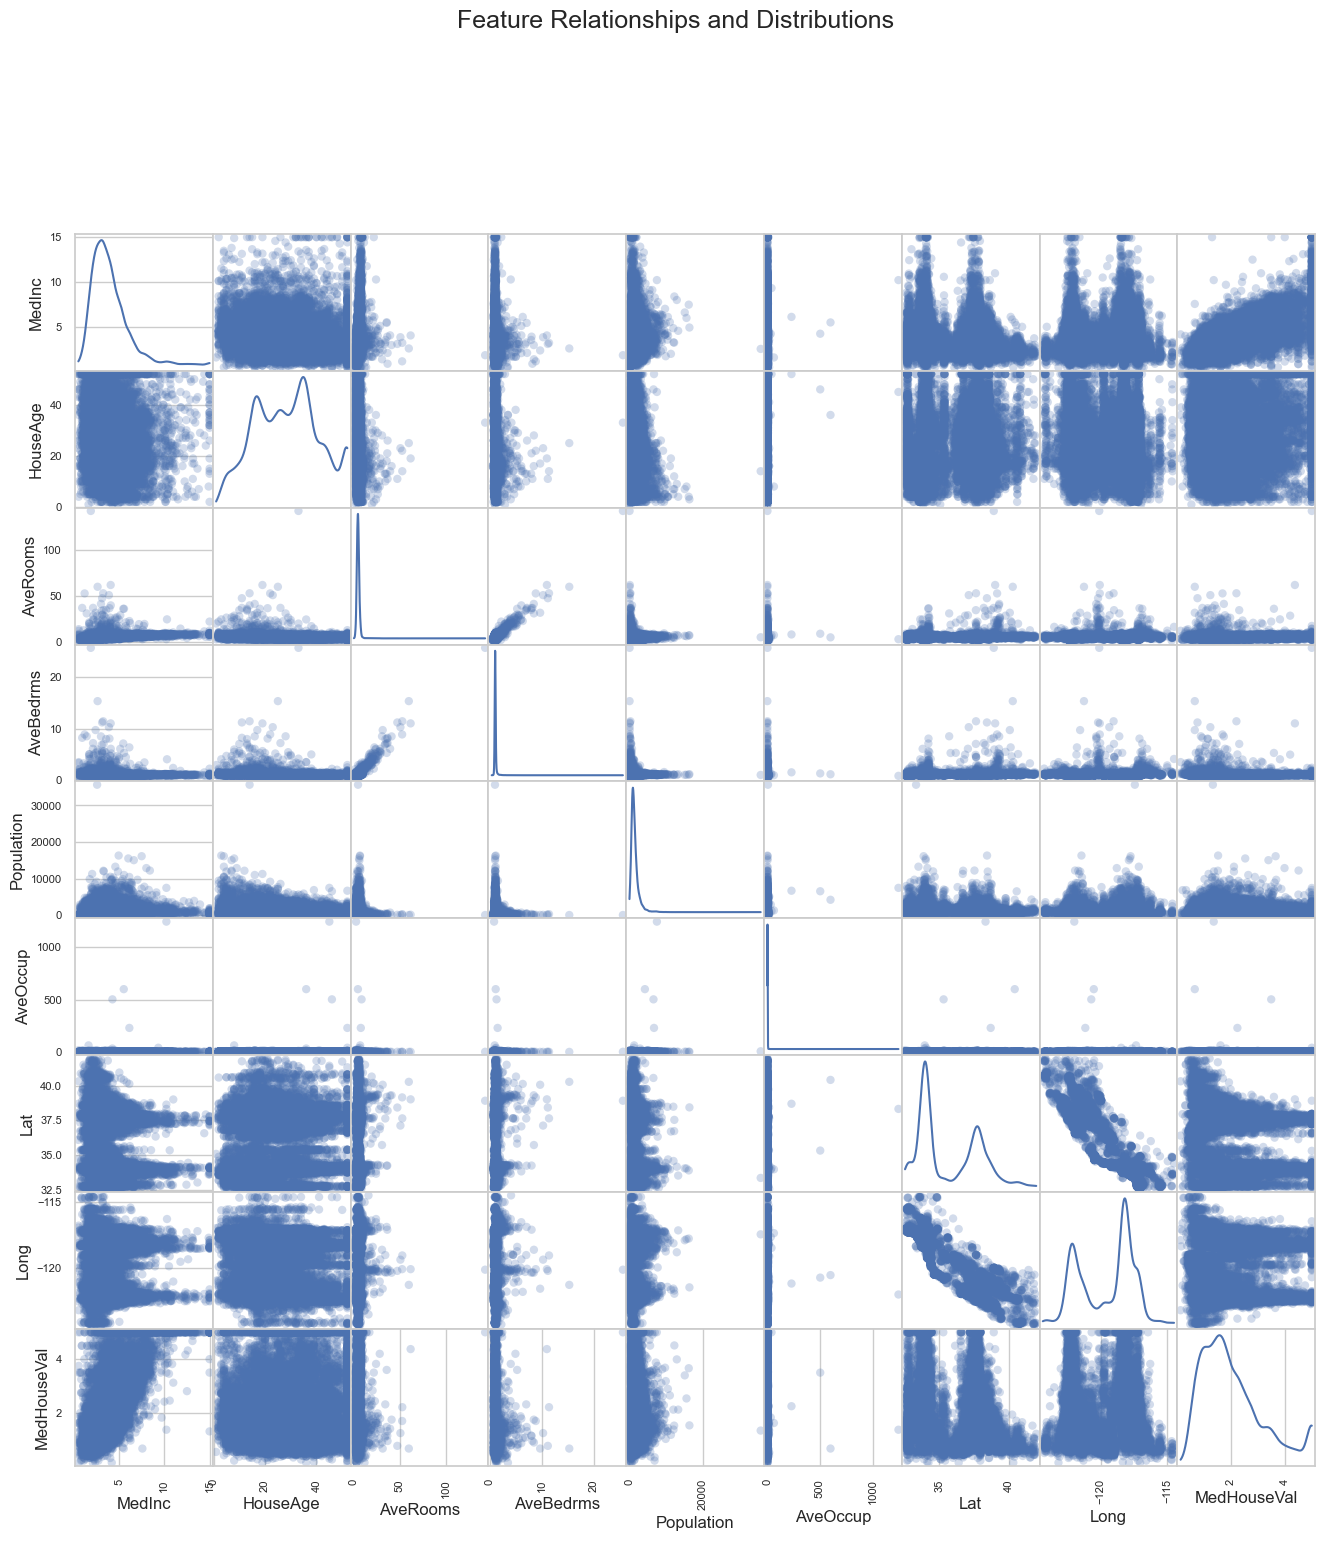

In [80]:
# Scatter plot to observe relationships between features and the target variable.
scatter_matrix = pd.plotting.scatter_matrix(
    data,
    alpha=0.25,
    figsize=(16, 16),
    diagonal="kde",
    marker="o"
)
plt.suptitle("Feature Relationships and Distributions", fontsize=18, y=1.02)
plt.show()

In [81]:
# Missing values count
print("Number of missing values")
print("------------------------------")
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_info)

print("\nNumber of unique values")
print("------------------------------")
unique_values = data.nunique()
print(unique_values)

Number of missing values
------------------------------
             Missing Values  Percentage
MedInc                    0         0.0
HouseAge                  0         0.0
AveRooms                  0         0.0
AveBedrms                 0         0.0
Population                0         0.0
AveOccup                  0         0.0
Lat                       0         0.0
Long                      0         0.0
MedHouseVal               0         0.0

Number of unique values
------------------------------
MedInc         10372
HouseAge          52
AveRooms       14722
AveBedrms      11369
Population      3563
AveOccup       14356
Lat              840
Long             811
MedHouseVal     3602
dtype: int64


Correlation matrix for features
------------------------------
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.126398  0.338891  -0.070325    0.006030  0.022880   
HouseAge    -0.126398  1.000000 -0.164742  -0.089941   -0.296191  0.015903   
AveRooms     0.338891 -0.164742  1.000000   0.836048   -0.076527 -0.004385   
AveBedrms   -0.070325 -0.089941  0.836048   1.000000   -0.071595 -0.005768   
Population   0.006030 -0.296191 -0.076527  -0.071595    1.000000  0.074505   
AveOccup     0.022880  0.015903 -0.004385  -0.005768    0.074505  1.000000   
Lat         -0.077792  0.010531  0.113740   0.077687   -0.105442  0.006585   
Long        -0.017599 -0.109259 -0.033491   0.012110    0.098350 -0.001187   
MedHouseVal  0.689480  0.101697  0.163119  -0.049184   -0.023517 -0.021679   

                  Lat      Long  MedHouseVal  
MedInc      -0.077792 -0.017599     0.689480  
HouseAge     0.010531 -0.109259     0.101697  
AveRooms     0.

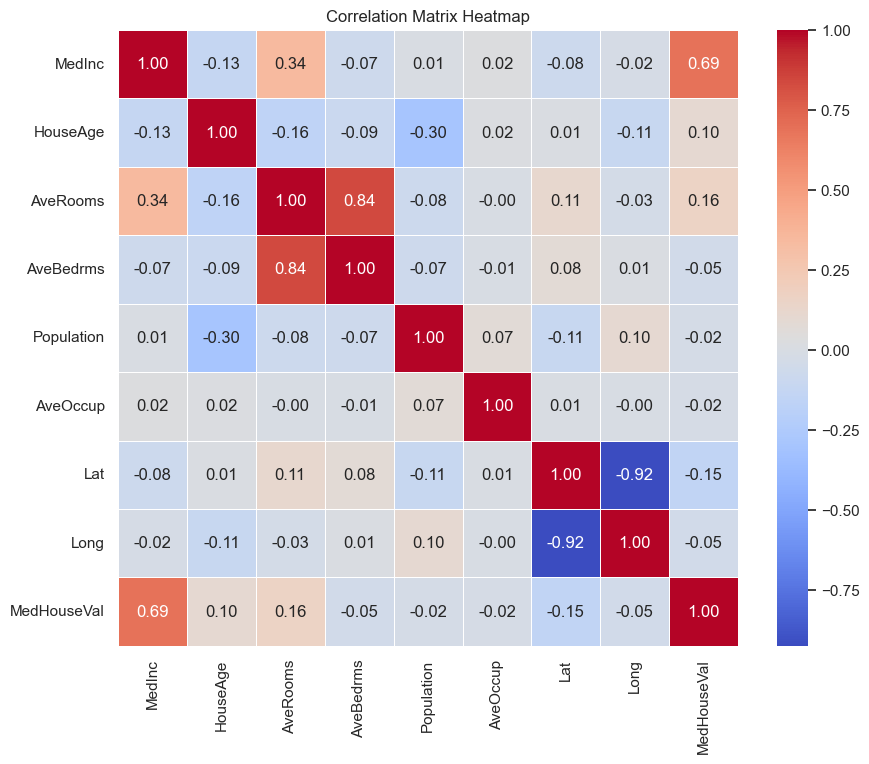

In [82]:
print("Correlation matrix for features")
print("------------------------------")
correlation_matrix = data.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [83]:
print("Number of outliers:")
print("------------------------------")
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as values outside 1.5*IQR
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

outliers_count = outliers.sum()
print(outliers_count)

Number of outliers:
------------------------------
MedInc          513
HouseAge          0
AveRooms        384
AveBedrms      1060
Population      908
AveOccup        532
Lat               0
Long              0
MedHouseVal     793
dtype: int64


In [ ]:
# Preprocessing
# Normalization
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

# Split X_train to validation and train data
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=302)